# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

/home/naiara/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:53: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [6]:
athletes.shape

(11538, 11)

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [7]:
#retirando a amostra da coluna height
altura = get_sample(athletes,'height',n=3000)

#teste de normalidade
shapiro = sct.shapiro(altura)
shapiro

(0.9961519837379456, 5.681722541339695e-07)

In [8]:
print(altura.mean())
print(altura.median())
print(altura.mode())

1.76678
1.76
0    1.8
dtype: float64


In [9]:
# olha só, p-valor bem menor que meu alfa de 5%
# isso significa que tenho que rejeitar minha hipótese nula (hipotese de normalidade)
# não ha evidências de que minha distribuição seja normal!
alpha = 0.05
shapiro[1] > alpha

False

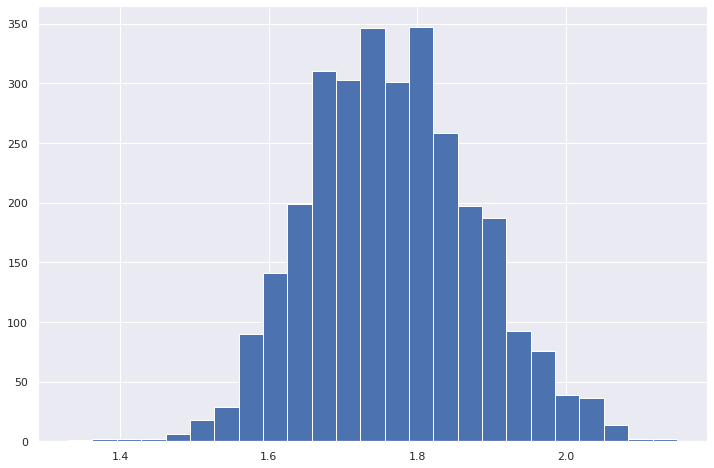

In [10]:
plt.hist(altura, bins = 25);

In [11]:
import statsmodels.api as sm

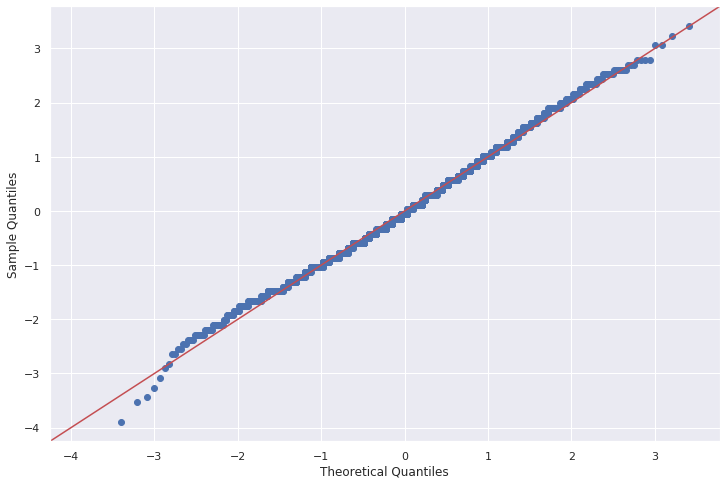

In [12]:
sm.qqplot(altura, fit=True, line="45");

In [13]:
def q1():
    altura = get_sample(athletes,'height',n=3000)
    shapiro = sct.shapiro(altura)
    alpha = 0.05
    return shapiro[1] > alpha

q1()

False

__Para refletir__:

* Olha só, ao contrário do que eu imaginava, a amostra da altura dos atletas NÃO TEM tem distribuição Normal.

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [14]:
jb = sct.jarque_bera(altura)
jb

(13.03363513594265, 0.001478366424594868)

In [15]:
jb[1] > alpha

False

In [16]:
def q2():
    altura = get_sample(athletes,'height',n=3000)
    jb = sct.jarque_bera(altura)
    alpha = 0.05
    return jb[1] > alpha

q2()

False

__Para refletir__:

* Em ambos os testes (ainda bem!) tivemos resultados de que a distribuição das alturas não é normal!

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [17]:
peso = get_sample(athletes,'weight',n=3000)
teste = sct.normaltest(peso)
teste

NormaltestResult(statistic=510.24655809881176, pvalue=1.5898922918029537e-111)

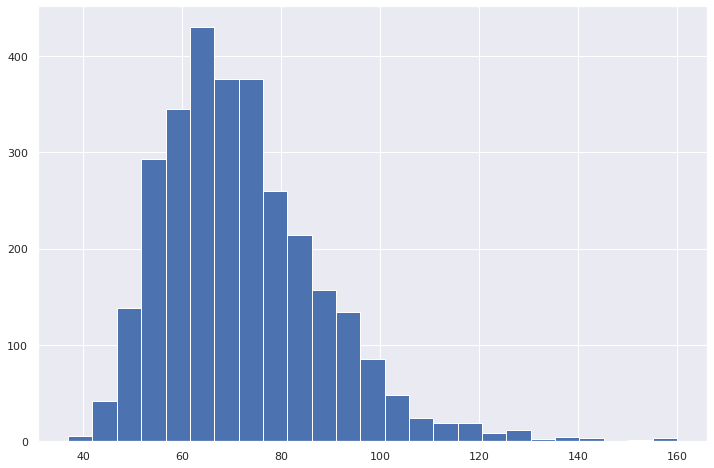

In [18]:
plt.hist(peso, bins=25);

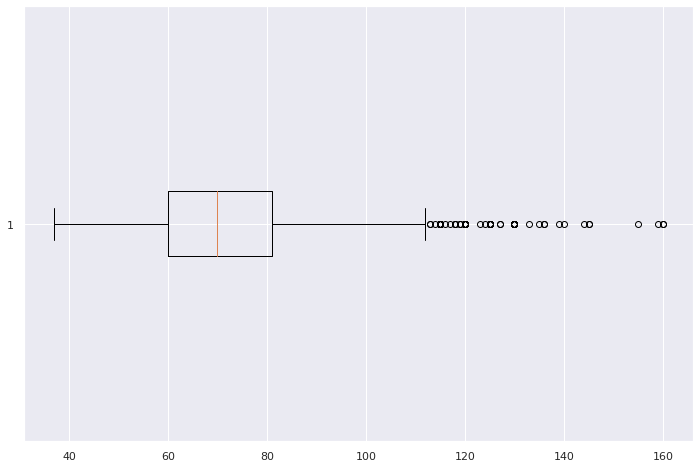

In [19]:
plt.boxplot(peso, vert=False);

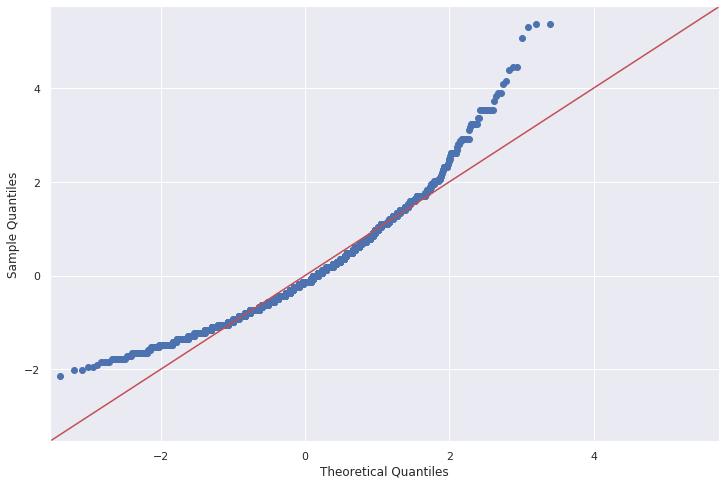

In [20]:
sm.qqplot(peso, fit=True, line="45");

In [21]:
def q3():
    peso = get_sample(athletes,'weight',n=3000)
    teste = sct.normaltest(peso)
    alpha = 0.05
    return teste[1] > alpha

q3()

False

__Para refletir__:

* Essa amostra claramente NÃO É distribuída normalmente
* Isso pode ser verificado pelo resultado do teste, o boxplot e o gg-plot

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

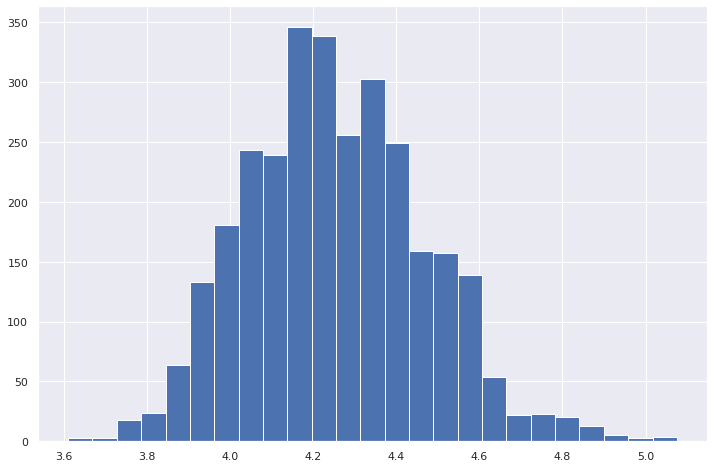

In [22]:
peso_trans = np.log(peso)
plt.hist(peso_trans, bins=25);

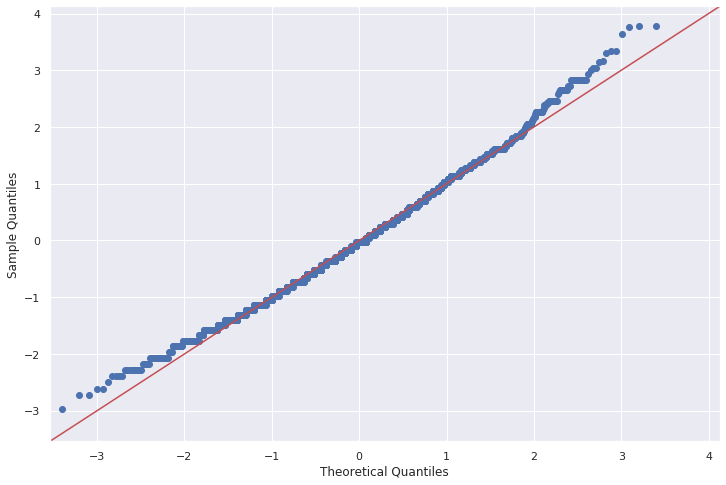

In [23]:
sm.qqplot(peso_trans, fit=True, line="45");

In [24]:
teste2 = sct.normaltest(peso_trans)
teste2

NormaltestResult(statistic=45.91534331977353, pvalue=1.0705572101256944e-10)

In [25]:
alpha = 0.05
teste2[1] > alpha 

False

In [26]:
def q4():
    peso = get_sample(athletes,'weight',n=3000)
    peso_trans = np.log(peso)
    teste2 = sct.normaltest(peso_trans)
    alpha = 0.05
    return teste2[1] > alpha

q4()

False

__Para refletir__:

* Bom, eu ainda não esperava uma normalidade (por causa dos gráficos) e esperava que o p-valor aumentasse, o que foi verificado!

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrames` chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [27]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [28]:
bra = athletes[athletes.nationality == "BRA"]
usa = athletes[athletes.nationality == "USA"]
can = athletes[athletes.nationality == "CAN"]

In [29]:
print('Altura média EUA = ',usa.height.mean())
print('Altura média Brasil = ',bra.height.mean())

Altura média EUA =  1.787767857142857
Altura média Brasil =  1.764033613445378


In [30]:
braXusa = sct.ttest_ind(bra.height, usa.height, equal_var=False, nan_policy='omit')
braXusa

Ttest_indResult(statistic=-3.2232436467501855, pvalue=0.0013080041830140115)

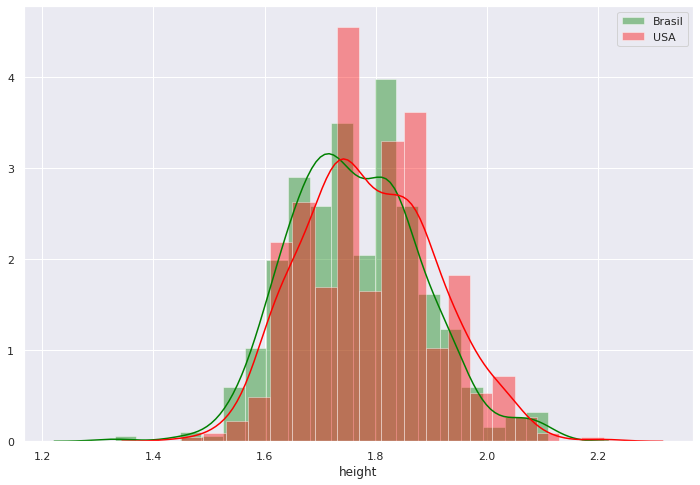

In [31]:
sns.distplot(bra.height.dropna(), label='Brasil', color='green')
sns.distplot(usa.height.dropna(), label='USA', color ='red')
plt.legend();

In [32]:
# Minha hipótese nula é a de igualdade entre as médias
# como meu p-valor foi menor que meu alfa, tenho um indicativo para rejeitar a hipotese nula
# isso significa que minhas amostras não são iguais!!
alpha = 0.05
braXusa[1] > alpha

False

In [33]:
def q5():
    bra = athletes[athletes.nationality == "BRA"]
    usa = athletes[athletes.nationality == "USA"]
    braXusa = sct.ttest_ind(bra.height, usa.height, equal_var=False, nan_policy='omit')
    alpha = 0.05
    return bool(braXusa[1] > alpha)

q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [34]:
print('Altura média Brasil = ',bra.height.mean())
print('Altura média Canada = ',can.height.mean())

Altura média Brasil =  1.764033613445378
Altura média Canada =  1.75859375


In [35]:
braXcan = sct.ttest_ind(bra.height, can.height, equal_var=False, nan_policy='omit')
braXcan

Ttest_indResult(statistic=0.6389304914365109, pvalue=0.5230827295440921)

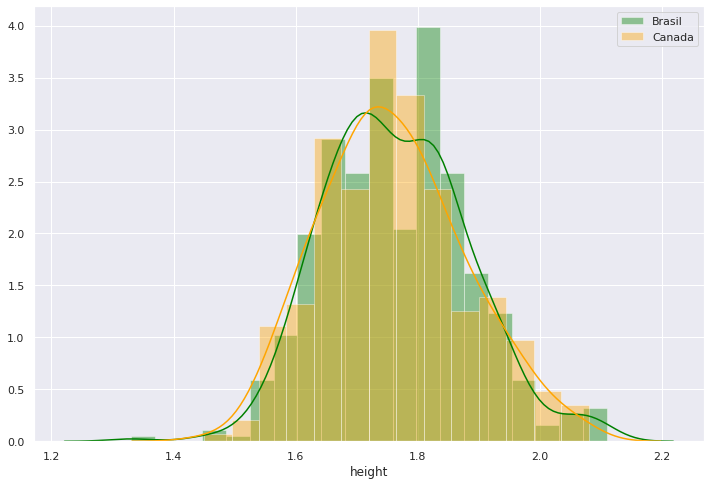

In [36]:
sns.distplot(bra.height.dropna(), label='Brasil', color='green')
sns.distplot(can.height.dropna(), label='Canada', color ='orange')
plt.legend();

In [37]:
# Olha, olha, distribuições iguais!
braXcan[1] > alpha

True

In [38]:
def q6():
    bra = athletes[athletes.nationality == "BRA"]
    can = athletes[athletes.nationality == "CAN"]
    braXcan = sct.ttest_ind(bra.height, can.height, equal_var=False, nan_policy='omit')
    alpha = 0.05
    return braXcan[1] > alpha

q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [39]:
print('Altura média EUA = ',usa.height.mean())
print('Altura média Canada = ',can.height.mean())

Altura média EUA =  1.787767857142857
Altura média Canada =  1.75859375


In [40]:
usaXcan = sct.ttest_ind(usa.height, can.height, equal_var=False, nan_policy='omit')
usaXcan

Ttest_indResult(statistic=3.516987632488539, pvalue=0.0004660129347389851)

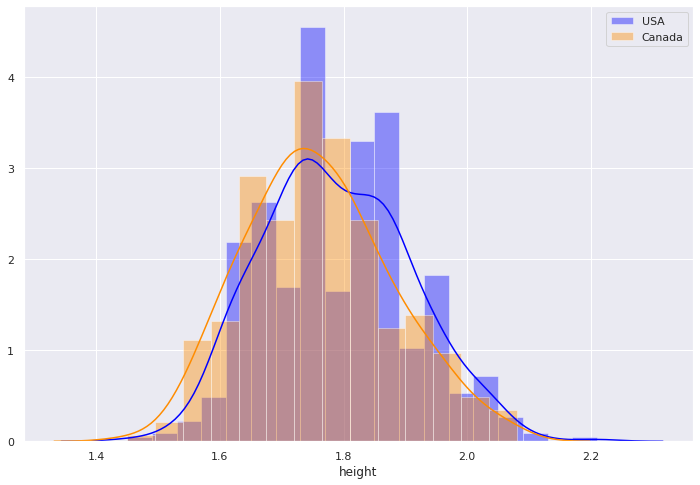

In [41]:
sns.distplot(usa.height.dropna(), label='USA', color='blue')
sns.distplot(can.height.dropna(), label='Canada', color ='darkorange')
plt.legend();

In [42]:
usaXcan[1] > alpha

False

In [43]:
def q7():
    usa = athletes[athletes.nationality == "USA"]
    can = athletes[athletes.nationality == "CAN"]
    usaXcan = sct.ttest_ind(usa.height,can.height, equal_var=False, nan_policy='omit')
    return round(usaXcan[1],8)

q7()

0.00046601

__Para refletir__:

* Da para ver pelos resultados que as alturas dos atletas do Brasil e do Canadá tem distribuições iguais.
* Comparando Brasil x EUA e EUA x Canada, o restultado indica que as alturas dos atletas tem diferentes distribuições (o que da para perceber pelos gráficos)
* Percebemos que a altura dos atletas dos EUA é estatisticamente maior que dos outros dois países